## PREDICTING BANK TELEMARKETING SUCCESS

The success of marketing campaigns can be highly specific to the product, the target audience, and the campaign methods. In this problem, we examine data from direct marketing campaigns of a Portuguese banking institution between May 2008 and November 2010. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be or not subscribed.

In this analysis, the goal would be predicting the dependent variable y, which takes value 1 if the the client subscribed to a term deposit, and 0 otherwise. The data we will be using bank.csv is a subset of the original data, containing 5000 examples and 20 input variables. The variable information is as follows:


- age
- job - type of job
- marital - marital status
- education - Shows the level of education of each customer
- default - Whether a customer has credit in default
- housing - Does the customer have a housing loan?
- loan - Does the customer have a personal loan?
- contact - The contact communication type
- month - Last contact month of year
- day_of_week - Last contact day of Week
- duration - Last contact duration in seconds (Note: this variable is not known before making the call)
- campaign - Number of contact performed for the client during the campaign
- pdays - number of days that passed by after the client was last contacted from a previous campaign (value of 999 means the client was not previously contacted)
- previous - number of contacts performed before this campaign and for this client
- poutcome - outcome of the previous marketing campaign
- emp.var.rate - employment variation rate - quarterly indicator
- cons.price.idx - consumer price index - monthly indicator
- cons.conf.idx - consumer confidence index - monthly indicator
- euribor3m - euribor 3 month rate - daily indicator
- nr.employed - number of employees - quarterly indicator


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)


from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

from sklearn.linear_model import LogisticRegression


#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer

#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,52,admin.,single,university.degree,unknown,unknown,unknown,cellular,aug,wed,138,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
1,49,blue-collar,divorced,high.school,no,no,yes,telephone,may,mon,742,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,25,blue-collar,single,basic.9y,no,yes,yes,cellular,jul,wed,322,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
3,27,admin.,single,university.degree,no,no,no,telephone,oct,tue,540,1,999,0,nonexistent,-0.1,93.798,-40.4,4.860,5195.8,1
4,44,admin.,married,university.degree,no,yes,no,cellular,aug,wed,113,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,37,technician,divorced,professional.course,no,yes,no,cellular,aug,tue,520,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
4996,39,blue-collar,divorced,high.school,no,yes,yes,telephone,may,tue,163,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
4997,28,services,single,professional.course,no,no,no,telephone,may,thu,210,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,0
4998,32,admin.,single,university.degree,unknown,no,no,cellular,aug,tue,240,5,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   job             5000 non-null   object 
 2   marital         5000 non-null   object 
 3   education       5000 non-null   object 
 4   default         5000 non-null   object 
 5   housing         5000 non-null   object 
 6   loan            5000 non-null   object 
 7   contact         5000 non-null   object 
 8   month           5000 non-null   object 
 9   day_of_week     5000 non-null   object 
 10  duration        5000 non-null   int64  
 11  campaign        5000 non-null   int64  
 12  pdays           5000 non-null   int64  
 13  previous        5000 non-null   int64  
 14  poutcome        5000 non-null   object 
 15  emp.var.rate    5000 non-null   float64
 16  cons.price.idx  5000 non-null   float64
 17  cons.conf.idx   5000 non-null   f

In [5]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,5000.000000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.00000,5000.000000,5000.000000,5000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
unique,NaN,12,4,8,2,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1260,3026,1457,3998,2604,4144,3149,1680,1047,NaN,NaN,NaN,NaN,4296,NaN,NaN,NaN,NaN,NaN,NaN
mean,39.581400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.173400,2.53760,958.682000,0.177800,NaN,0.05834,93.569322,-40.538980,3.596636,5166.480940,0.118200
std,10.254112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.436793,2.81776,196.012383,0.505013,NaN,1.58084,0.577387,4.606221,1.742869,71.908468,0.322877
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.00000,0.000000,0.000000,NaN,-3.40000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.000000,1.00000,999.000000,0.000000,NaN,-1.80000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.000000,2.00000,999.000000,0.000000,NaN,1.10000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.000000,3.00000,999.000000,0.000000,NaN,1.40000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [6]:
df.shape

(5000, 21)

In [ ]:
df.columns

### Data Visualization

### Univariate Data Exploration

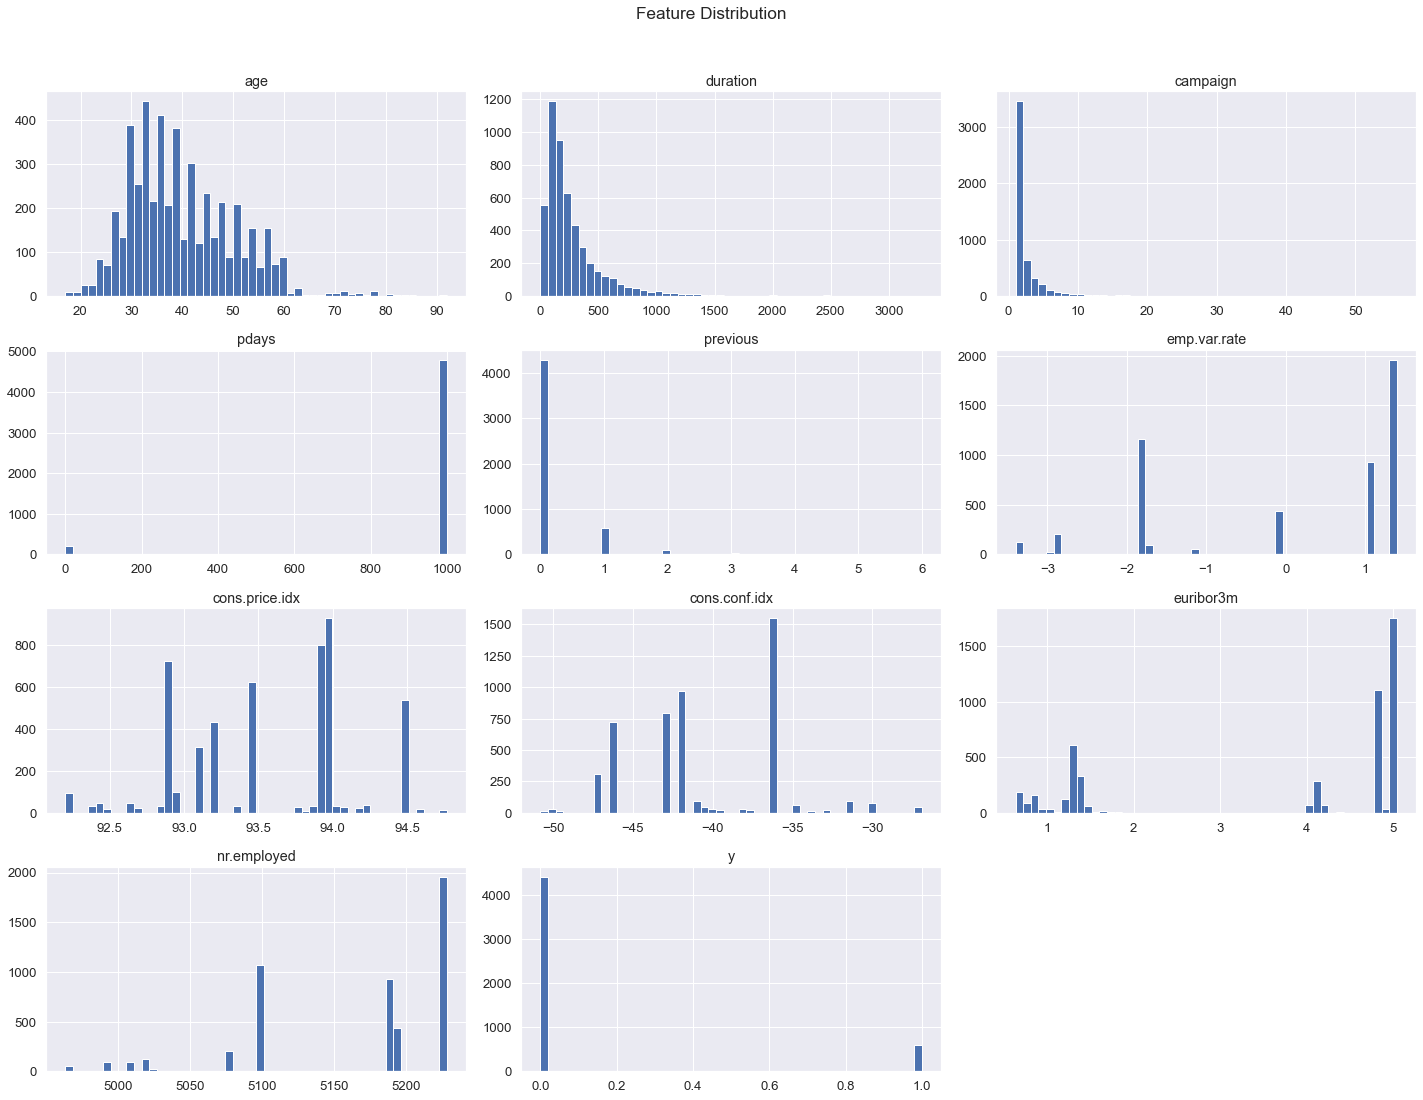

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

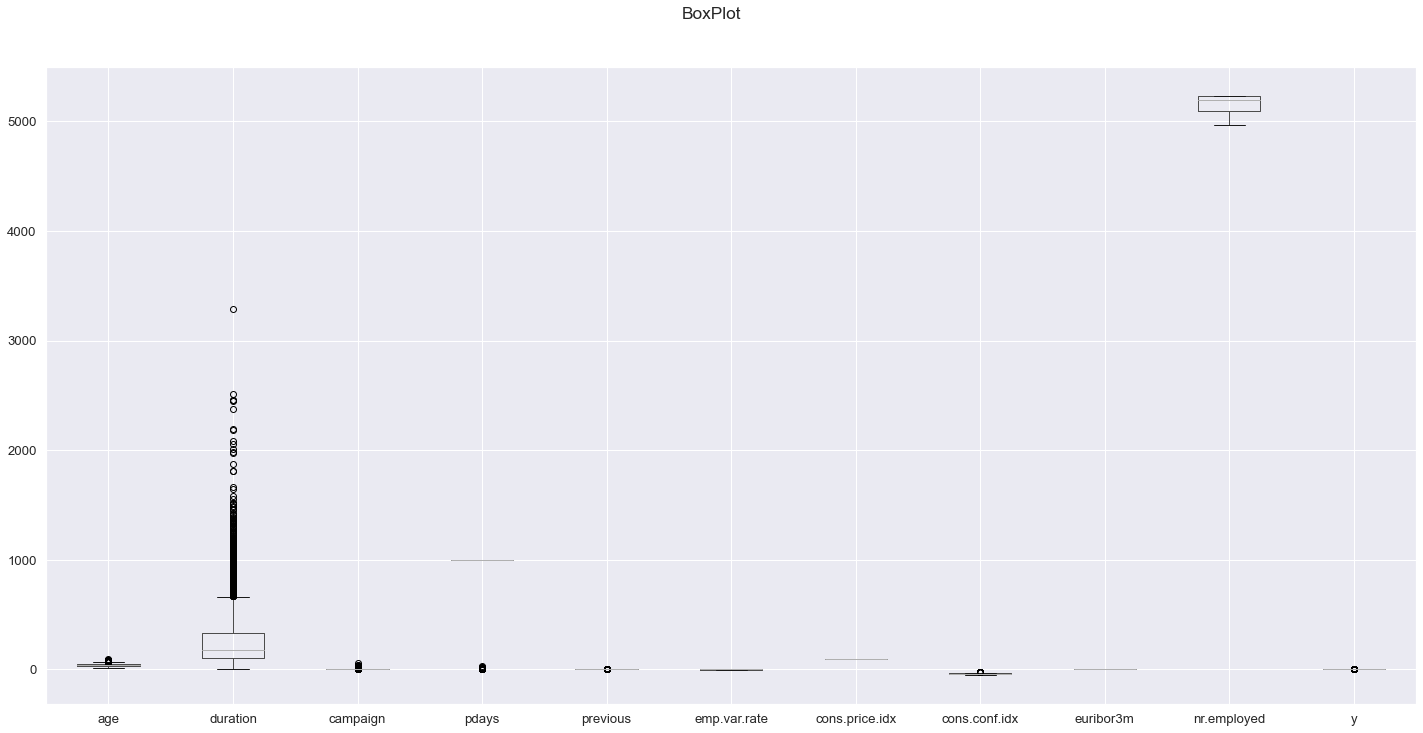

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Problem 2 - Call Durations by Job

In [9]:
calljob = df.groupby(["job"]).mean()
calljob

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,37.910317,256.575397,2.624603,952.479365,0.189683,0.032540,93.528238,-40.323968,3.578049,5166.796825,0.123810
blue-collar,39.483761,284.400000,2.573504,978.635897,0.141880,0.205470,93.641350,-41.336239,3.729979,5173.867521,0.097436
entrepreneur,42.723757,279.767956,2.392265,955.121547,0.160221,0.150829,93.594569,-40.449171,3.809116,5174.942541,0.060773
housemaid,45.474576,303.254237,2.576271,956.881356,0.211864,0.429661,93.749729,-39.792373,3.944127,5173.222881,0.101695
management,41.182065,261.000000,2.380435,969.269022,0.173913,-0.101087,93.514185,-40.632609,3.483500,5161.161413,0.122283
retired,61.518717,285.877005,2.620321,903.320856,0.310160,-0.561497,93.440278,-38.485561,2.908150,5130.073262,0.224599
self-employed,40.151899,287.360759,2.721519,967.601266,0.158228,-0.058861,93.547797,-41.184177,3.500095,5164.225949,0.158228
services,37.933333,269.602222,2.597778,974.706667,0.137778,0.183111,93.656609,-41.186222,3.702107,5170.664444,0.093333
student,24.689922,255.751938,2.100775,768.139535,0.534884,-1.549612,93.231519,-40.372868,1.764093,5086.390698,0.286822


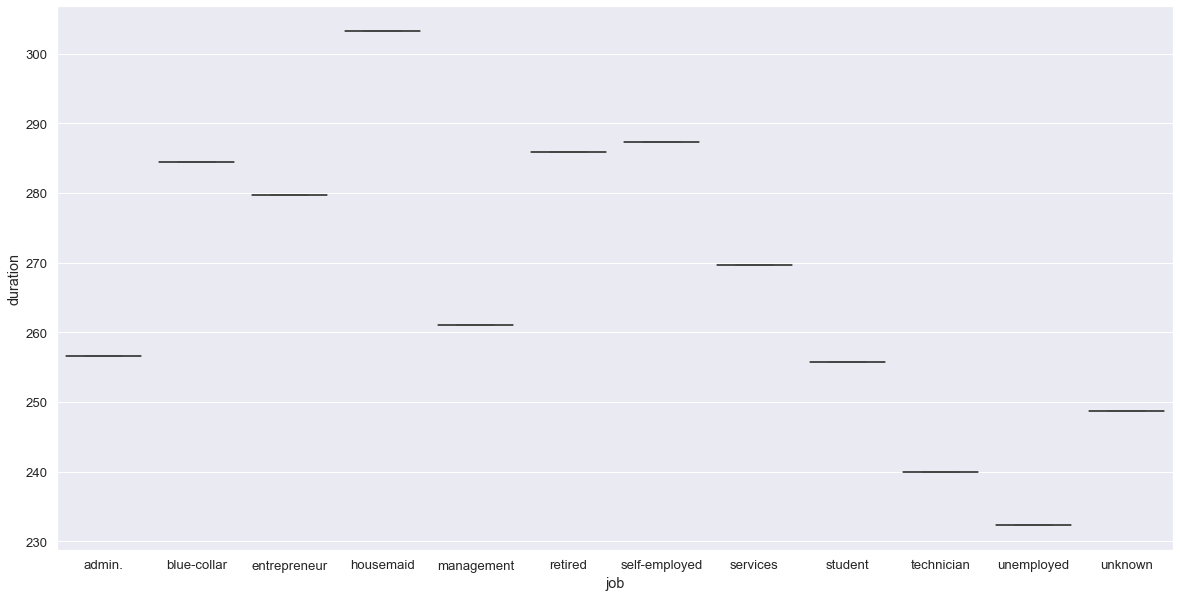

In [10]:
plt.figure(figsize=(20,10))
plt.title("")
sns.boxplot(x=calljob.index,y=calljob.duration,data=calljob)
plt.show()

In [11]:
calljob["duration"].sort_values()

job
unemployed       232.305344
technician       239.905172
unknown          248.722222
student          255.751938
admin.           256.575397
management       261.000000
services         269.602222
entrepreneur     279.767956
blue-collar      284.400000
retired          285.877005
self-employed    287.360759
housemaid        303.254237
Name: duration, dtype: float64

### Problem 3 - Multicolinearity

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')

In [13]:
df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.780879,0.204491,0.973299,0.914130
cons.price.idx,0.780879,1.000000,0.079211,0.700070,0.545222
cons.conf.idx,0.204491,0.079211,1.000000,0.282205,0.099709
euribor3m,0.973299,0.700070,0.282205,1.000000,0.947981
nr.employed,0.914130,0.545222,0.099709,0.947981,1.000000


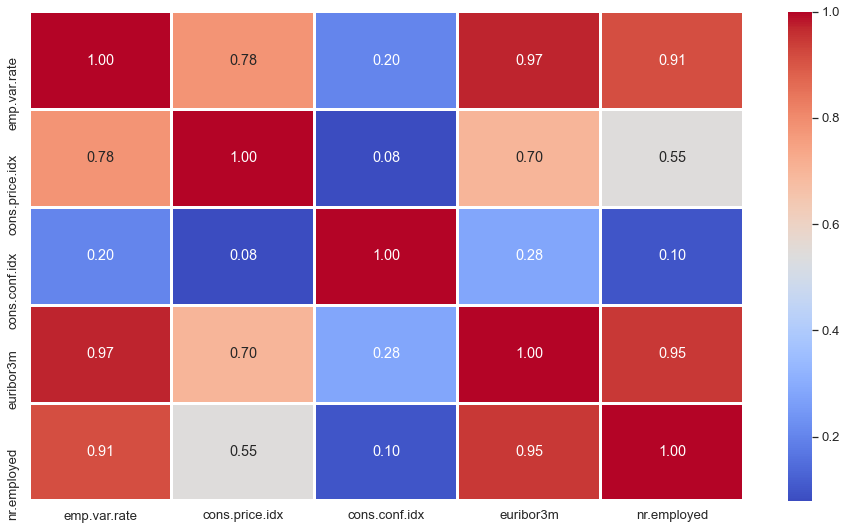

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Problem 4 - Splitting into a Training and Testing Set 

### Drop unwanted features

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')

In [16]:
df.drop(['duration','euribor3m', 'nr.employed'],axis=1,inplace=True)

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,52,admin.,single,university.degree,unknown,unknown,unknown,cellular,aug,wed,3,999,0,nonexistent,1.4,93.444,-36.1,0
1,49,blue-collar,divorced,high.school,no,no,yes,telephone,may,mon,2,999,0,nonexistent,1.1,93.994,-36.4,0
2,25,blue-collar,single,basic.9y,no,yes,yes,cellular,jul,wed,2,999,0,nonexistent,1.4,93.918,-42.7,0
3,27,admin.,single,university.degree,no,no,no,telephone,oct,tue,1,999,0,nonexistent,-0.1,93.798,-40.4,1
4,44,admin.,married,university.degree,no,yes,no,cellular,aug,wed,1,999,0,nonexistent,-2.9,92.201,-31.4,0


In [18]:
df.shape

(5000, 18)

### Treat Missing Values

In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64

### Perform One-Hot Encoding

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   job             5000 non-null   object 
 2   marital         5000 non-null   object 
 3   education       5000 non-null   object 
 4   default         5000 non-null   object 
 5   housing         5000 non-null   object 
 6   loan            5000 non-null   object 
 7   contact         5000 non-null   object 
 8   month           5000 non-null   object 
 9   day_of_week     5000 non-null   object 
 10  campaign        5000 non-null   int64  
 11  pdays           5000 non-null   int64  
 12  previous        5000 non-null   int64  
 13  poutcome        5000 non-null   object 
 14  emp.var.rate    5000 non-null   float64
 15  cons.price.idx  5000 non-null   float64
 16  cons.conf.idx   5000 non-null   float64
 17  y               5000 non-null   i

In [21]:
df["job"].value_counts()

admin.           1260
blue-collar      1170
technician        812
services          450
management        368
retired           187
entrepreneur      181
self-employed     158
unemployed        131
student           129
housemaid         118
unknown            36
Name: job, dtype: int64

In [22]:
df["marital"].value_counts()

married     3026
single      1467
divorced     498
unknown        9
Name: marital, dtype: int64

In [23]:
df["education"].value_counts()

university.degree      1457
high.school            1126
basic.9y                759
professional.course     634
basic.4y                505
basic.6y                301
unknown                 216
illiterate                2
Name: education, dtype: int64

In [24]:
df["default"].value_counts()

no         3998
unknown    1002
Name: default, dtype: int64

In [25]:
df["housing"].value_counts()

yes        2604
no         2278
unknown     118
Name: housing, dtype: int64

In [26]:
df["loan"].value_counts()

no         4144
yes         738
unknown     118
Name: loan, dtype: int64

In [27]:
df["contact"].value_counts()

cellular     3149
telephone    1851
Name: contact, dtype: int64

In [28]:
df["month"].value_counts()

may    1680
jul     853
aug     750
jun     662
nov     491
apr     341
oct      72
mar      68
sep      58
dec      25
Name: month, dtype: int64

In [29]:
df["day_of_week"].value_counts()

thu    1047
wed    1043
mon    1007
tue     987
fri     916
Name: day_of_week, dtype: int64

In [30]:
df["poutcome"].value_counts()

nonexistent    4296
failure         515
success         189
Name: poutcome, dtype: int64

In [31]:
df["y"].value_counts()

0    4409
1     591
Name: y, dtype: int64

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'y'], dtype='object')

In [33]:
df_cat = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']]

In [34]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,admin.,single,university.degree,unknown,unknown,unknown,cellular,aug,wed,nonexistent
1,blue-collar,divorced,high.school,no,no,yes,telephone,may,mon,nonexistent
2,blue-collar,single,basic.9y,no,yes,yes,cellular,jul,wed,nonexistent
3,admin.,single,university.degree,no,no,no,telephone,oct,tue,nonexistent
4,admin.,married,university.degree,no,yes,no,cellular,aug,wed,nonexistent


In [35]:
df_cat_trans = pd.get_dummies(df_cat, drop_first=True)

In [36]:
df_cat_trans.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [37]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
y                   int64
dtype: object

In [38]:
df_num = df[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','y']]

In [39]:
df_num.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,52,3,999,0,1.4,93.444,-36.1,0
1,49,2,999,0,1.1,93.994,-36.4,0
2,25,2,999,0,1.4,93.918,-42.7,0
3,27,1,999,0,-0.1,93.798,-40.4,1
4,44,1,999,0,-2.9,92.201,-31.4,0


In [40]:
df_final = pd.concat([df_cat_trans,df_num],axis=1)

In [41]:
df_final

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,52,3,999,0,1.4,93.444,-36.1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,49,2,999,0,1.1,93.994,-36.4,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,25,2,999,0,1.4,93.918,-42.7,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,27,1,999,0,-0.1,93.798,-40.4,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,44,1,999,0,-2.9,92.201,-31.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,37,2,999,0,1.4,93.444,-36.1,0
4996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,39,3,999,0,1.1,93.994,-36.4,0
4997,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,28,2,999,0,-1.8,92.893,-46.2,0
4998,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,32,5,999,0,1.4,93.444,-36.1,0


### Create and save processed dataset

In [42]:
#df_final.to_csv("finaldataset.csv",index=False)

In [43]:
df = pd.read_csv("finaldataset.csv")

In [44]:
df.shape

(5000, 50)

### Train Test Split

In [45]:
X = df.iloc[:,0:49]
y = df.iloc[:,49]

### Train Test Split Cont'd

In [46]:
X.values, y.values

(array([[  0.   ,   0.   ,   0.   , ...,   1.4  ,  93.444, -36.1  ],
        [  1.   ,   0.   ,   0.   , ...,   1.1  ,  93.994, -36.4  ],
        [  1.   ,   0.   ,   0.   , ...,   1.4  ,  93.918, -42.7  ],
        ...,
        [  0.   ,   0.   ,   0.   , ...,  -1.8  ,  92.893, -46.2  ],
        [  0.   ,   0.   ,   0.   , ...,   1.4  ,  93.444, -36.1  ],
        [  0.   ,   0.   ,   0.   , ...,  -0.1  ,  93.2  , -42.   ]]),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y )

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 49), (1500, 49), (3500,), (1500,))

### Feature Scaling

In [49]:
X_train

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
1447,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,38,5,999,0,-1.8,92.893,-46.2
2882,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,58,2,999,0,1.1,93.994,-36.4
3748,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,33,2,999,0,1.1,93.994,-36.4
1026,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,34,1,999,0,-1.8,93.075,-47.1
4331,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,37,6,999,0,1.4,94.465,-41.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,32,1,999,1,-1.8,93.075,-47.1
1753,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,50,2,999,0,1.4,94.465,-41.8
3822,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,32,1,999,0,-2.9,92.963,-40.8
4068,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,36,1,999,1,-0.1,93.200,-42.0


In [50]:
minmax = MinMaxScaler()

In [51]:
X_train_scaled = minmax.fit_transform(X_train)

In [52]:
X_test_scaled = minmax.transform(X_test)

In [53]:
X_train_scaled

array([[0.        , 0.        , 0.        , ..., 0.33333333, 0.26968044,
        0.19246862],
       [0.        , 0.        , 0.        , ..., 0.9375    , 0.69875292,
        0.60251046],
       [0.        , 0.        , 0.        , ..., 0.9375    , 0.69875292,
        0.60251046],
       ...,
       [1.        , 0.        , 0.        , ..., 0.10416667, 0.29696025,
        0.41841004],
       [1.        , 0.        , 0.        , ..., 0.6875    , 0.3893219 ,
        0.36820084],
       [0.        , 0.        , 0.        , ..., 1.        , 0.48441154,
        0.61506276]])

In [54]:
X_test_scaled

array([[1.        , 0.        , 0.        , ..., 0.9375    , 0.69875292,
        0.60251046],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.26968044,
        0.19246862],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.26968044,
        0.19246862],
       ...,
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.26968044,
        0.19246862],
       [1.        , 0.        , 0.        , ..., 0.9375    , 0.69875292,
        0.60251046],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.34060795,
        0.15481172]])

### Problem 5 - Training a Logistic Regression Model 

### Model Training

### Using PyCaret

In [55]:
exp = setup(data = df, target = 'y', session_id=0, normalize=True, 
            numeric_features=['campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx']
           ) 

,Description,Value
0,session_id,0
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5000, 50)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,42
8,Ordinal Features,False
9,High Cardinality Features,False


In [56]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8911,0.7824,0.6208,0.8714,0.8718,0.3155,0.3491,0.2550
catboost,CatBoost Classifier,0.8857,0.7697,0.5846,0.8594,0.8596,0.2354,0.2783,6.3950
ridge,Ridge Classifier,0.8848,0.0000,0.5747,0.8581,0.8563,0.2130,0.2620,0.0140
lightgbm,Light Gradient Boosting Machine,0.8848,0.7633,0.5977,0.8615,0.8626,0.2620,0.2981,0.0850
gbc,Gradient Boosting Classifier,0.8820,0.7650,0.5680,0.8549,0.8529,0.1948,0.2440,0.2410
lr,Logistic Regression,0.8805,0.7565,0.5672,0.8478,0.8518,0.1899,0.2282,0.6740
ada,Ada Boost Classifier,0.8803,0.7523,0.5660,0.8470,0.8513,0.1870,0.2249,0.1140
svm,SVM - Linear Kernel,0.8794,0.0000,0.5751,0.8431,0.8519,0.1972,0.2229,0.0310
et,Extra Trees Classifier,0.8785,0.7755,0.6167,0.8579,0.8630,0.2853,0.3030,0.2620
lda,Linear Discriminant Analysis,0.8780,0.7548,0.6282,0.8582,0.8650,0.3036,0.3141,0.0310


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8914,0.8003,0.5895,0.8685,0.8656,0.2542,0.3043
1,0.8800,0.6971,0.5407,0.8391,0.8446,0.1230,0.1653
2,0.8886,0.7643,0.5768,0.8655,0.8587,0.2256,0.2862
3,0.8743,0.7539,0.5482,0.8337,0.8423,0.1393,0.1720
4,0.8771,0.7621,0.5498,0.8385,0.8442,0.1461,0.1854
5,0.8829,0.8114,0.5942,0.8563,0.8603,0.2535,0.2847
6,0.8800,0.7195,0.5720,0.8483,0.8526,0.2021,0.2387
7,0.8771,0.7582,0.5806,0.8466,0.8535,0.2170,0.2438
8,0.8771,0.7481,0.5703,0.8441,0.8506,0.1948,0.2257
9,0.8768,0.7502,0.5496,0.8372,0.8459,0.1431,0.1753


In [58]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


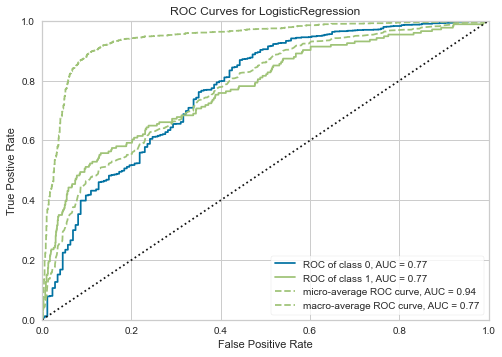

In [59]:
plot_model(lr, plot='auc')

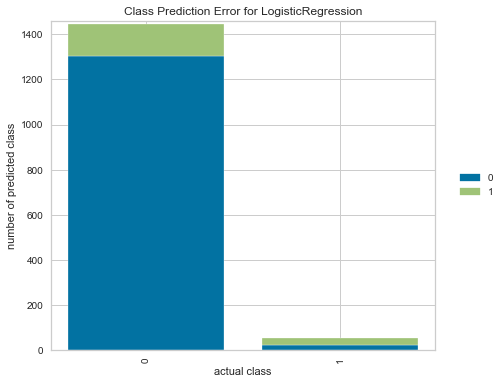

In [60]:
plot_model(lr, plot = 'error')

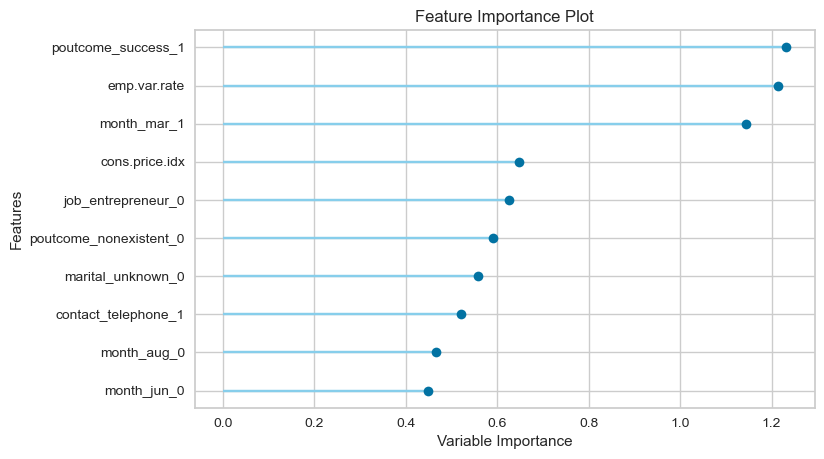

In [61]:
plot_model(lr, plot='feature')

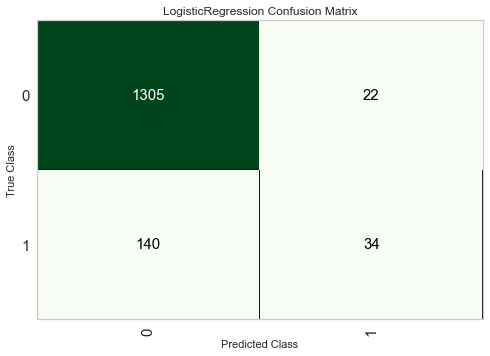

In [62]:
plot_model(lr, plot='confusion_matrix')

In [63]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [65]:
predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8921,0.7719,0.5894,0.8688,0.8667,0.2535,0.3021


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar_1,job_entrepreneur_0,job_housemaid_0,...,month_sep_1,day_of_week_mon_1,day_of_week_thu_1,day_of_week_tue_1,day_of_week_wed_1,poutcome_nonexistent_0,poutcome_success_1,y,Label,Score
0,-0.352252,0.535392,0.20642,-0.346218,0.649136,0.715764,0.902015,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9637
1,0.228764,-0.190848,0.20642,-0.346218,0.839179,0.584614,-0.473328,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9724
2,-0.352252,-0.553969,0.20642,-0.346218,-2.201504,-1.981290,2.975946,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6019
3,0.616108,-0.553969,0.20642,-0.346218,0.839179,0.584614,-0.473328,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9387
4,-1.417448,-0.190848,0.20642,-0.346218,-1.187943,-0.870035,-1.433885,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.7860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,-0.352252,-0.190848,0.20642,-0.346218,0.649136,0.715764,0.902015,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9410
1497,0.228764,-0.190848,0.20642,-0.346218,-1.187943,-1.184086,-1.237408,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8099
1498,-1.611120,0.898512,0.20642,-0.346218,-1.187943,-1.184086,-1.237408,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8684
1499,-0.739596,-0.553969,0.20642,-0.346218,0.649136,0.715764,0.902015,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9467


In [66]:
final_lr = finalize_model(lr)

### Using Logistic Regression

In [67]:
lr = LogisticRegression(random_state=0)

In [68]:
lrmodel = lr.fit(X_train_scaled,y_train)

In [69]:
y_pred = lrmodel.predict(X_test_scaled)

In [70]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
# get importance
importance = lrmodel.coef_[0]

In [72]:
importance

array([-0.05640755, -0.50183023, -0.44652127, -0.09824583, -0.00191097,
        0.26715676,  0.06757175,  0.12227675, -0.15504641, -0.2404114 ,
       -0.07261076,  0.3594959 ,  0.30072255,  0.02584135, -0.03108987,
        0.10425731, -0.1159429 ,  0.55057306,  0.21747299,  0.06180714,
       -0.43533916, -0.63641909,  0.04000117, -0.02591999,  0.04000117,
       -0.15982641, -0.7748709 ,  0.22393843,  0.14361449,  0.00121504,
       -0.29448539,  1.27635934, -0.36681483, -0.17716669,  0.37868541,
       -0.04043493, -0.30326746,  0.14495259, -0.01202342,  0.2457255 ,
        0.52884019,  1.11548083,  0.31735857, -0.56705293, -0.59443863,
        0.15601334, -2.70854478,  2.30448062,  0.34616247])

In [73]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.05641
Feature: 1, Score: -0.50183
Feature: 2, Score: -0.44652
Feature: 3, Score: -0.09825
Feature: 4, Score: -0.00191
Feature: 5, Score: 0.26716
Feature: 6, Score: 0.06757
Feature: 7, Score: 0.12228
Feature: 8, Score: -0.15505
Feature: 9, Score: -0.24041
Feature: 10, Score: -0.07261
Feature: 11, Score: 0.35950
Feature: 12, Score: 0.30072
Feature: 13, Score: 0.02584
Feature: 14, Score: -0.03109
Feature: 15, Score: 0.10426
Feature: 16, Score: -0.11594
Feature: 17, Score: 0.55057
Feature: 18, Score: 0.21747
Feature: 19, Score: 0.06181
Feature: 20, Score: -0.43534
Feature: 21, Score: -0.63642
Feature: 22, Score: 0.04000
Feature: 23, Score: -0.02592
Feature: 24, Score: 0.04000
Feature: 25, Score: -0.15983
Feature: 26, Score: -0.77487
Feature: 27, Score: 0.22394
Feature: 28, Score: 0.14361
Feature: 29, Score: 0.00122
Feature: 30, Score: -0.29449
Feature: 31, Score: 1.27636
Feature: 32, Score: -0.36681
Feature: 33, Score: -0.17717
Feature: 34, Score: 0.37869
Feature: 35,

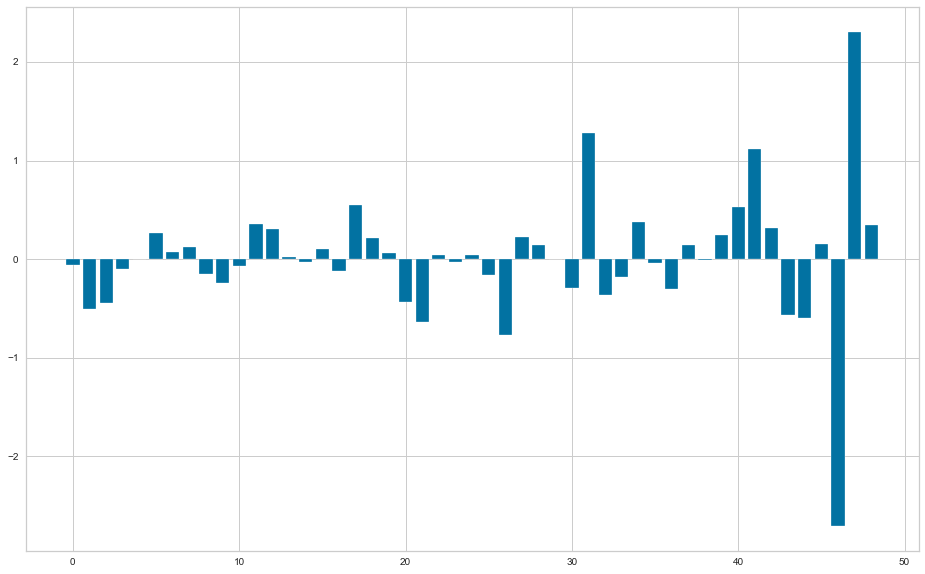

In [74]:
# plot feature importance
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [75]:
fimpt = pd.DataFrame(data=importance,columns=['Coef'])

In [76]:
fimpt

,Coef
0,-0.056408
1,-0.501830
2,-0.446521
3,-0.098246
4,-0.001911
5,0.267157
6,0.067572
7,0.122277
8,-0.155046
9,-0.240411


In [77]:
fimpt.reset_index()

,index,Coef
0,0,-0.056408
1,1,-0.501830
2,2,-0.446521
3,3,-0.098246
4,4,-0.001911
5,5,0.267157
6,6,0.067572
7,7,0.122277
8,8,-0.155046
9,9,-0.240411


In [78]:
fimpt.sort_values(by="Coef",ascending=False)

,Coef
47,2.304481
31,1.276359
41,1.115481
17,0.550573
40,0.528840
34,0.378685
11,0.359496
48,0.346162
42,0.317359
12,0.300723
